In [3]:
import numpy as np
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import tifffile as tif

In [131]:
cm = mpl.cm.viridis.copy()
#cm.set_bad('black')
cnorm = mpl.colors.LogNorm

In [4]:
def clean_and_normalize(x):
    x = np.nan_to_num(x, nan=0, posinf=0, neginf=0)
    x = (x - x.min()) / (x.max() - x.min())
    return x
    

In [3]:
base_path = Path('/home/skandel/AICDI/SLADS/S26_beamtime_data')

In [4]:
scan_37 = list(base_path.glob('scan_37_*'))[0]

In [50]:
hf = h5py.File(scan_37)

In [54]:
comx1 = hf['entry/scan/Detector/D12:s26_eiger_cnm:Stats1:CentroidX_RBV'][()]
comy1 = hf['entry/scan/Detector/D13:s26_eiger_cnm:Stats1:CentroidY_RBV'][()]
comx2 = hf['entry/scan/Detector/D18:s26_eiger_cnm:Stats4:CentroidX_RBV'][()]
comy2 = hf['entry/scan/Detector/D19:s26_eiger_cnm:Stats4:CentroidY_RBV'][()]
fluos = hf['entry/scan/Detector/D41:26idcXMAP:mca8.R27'][()]

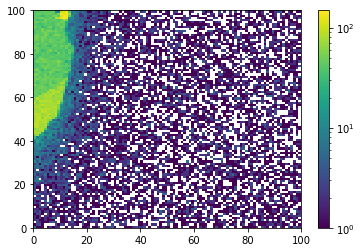

In [132]:
plt.pcolormesh(fluos, cmap=cm, norm=cnorm())
plt.colorbar()

In [136]:
data_all = hf['entry/data/data'][()]

In [141]:
integrated = data_all.sum(axis=0)

In [69]:
exp_data = np.load(base_path / 'coarsescan1.npy')

In [70]:
xrf = np.swapaxes(np.swapaxes(exp_data[4,::-1,::-1].reshape(6,4,100,100),1,2),1,3).reshape(600,400)[:,::-1]
comx = np.swapaxes(np.swapaxes(exp_data[0,::-1,::-1].reshape(6,4,100,100),1,2),1,3).reshape(600,400)[:,::-1]
comy = np.swapaxes(np.swapaxes(exp_data[1,::-1,::-1].reshape(6,4,100,100),1,2),1,3).reshape(600,400)[:,::-1]
comx -= comx[:100,-100:].mean()
comy -= comy[:100,-100:].mean()

In [75]:
xrf.shape

(600, 400)

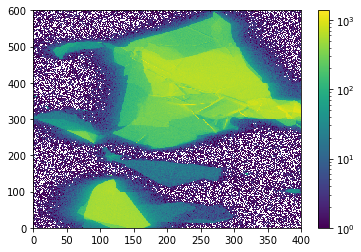

In [133]:
plt.pcolormesh(xrf, cmap=cm, norm=cnorm())
plt.colorbar()

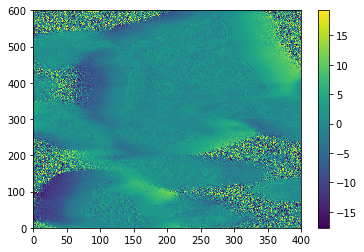

In [134]:
plt.pcolormesh(comx, cmap=cm)#, norm=cnorm())
plt.colorbar()

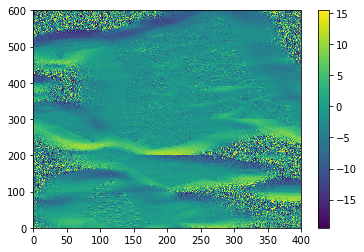

In [135]:
plt.pcolormesh(comy, cmap=cm)#, norm=cnorm())
plt.colorbar()

In [105]:
xrf = np.nan_to_num(xrf, nan=0, posinf=0, neginf=0)
log_xrf = np.log(xrf)
log_xrf = np.nan_to_num(log_xrf, nan=0, posinf=0, neginf=0)

/tmp/ipykernel_2118659/759339473.py:2: RuntimeWarning: divide by zero encountered in log
  log_xrf = np.log(xrf)


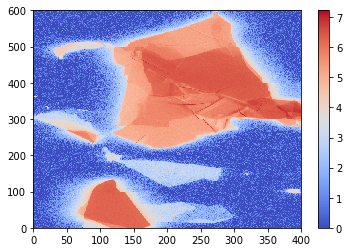

In [106]:
plt.pcolormesh(log_xrf, cmap=cm)# norm=cnorm())
plt.colorbar()

In [107]:
norm_xrf = (log_xrf - log_xrf.min()) / (log_xrf.max() - log_xrf.min())
#norm_xrf[np.isnan(norm_xrf)] = 0

In [140]:
tif.imwrite('norm_xrm.tif', norm_xrf)

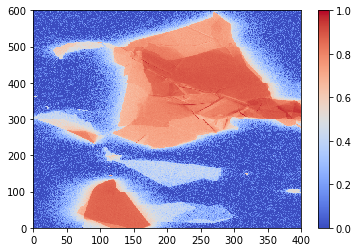

In [108]:
plt.pcolormesh(norm_xrf, cmap=cm)# norm=cnorm())
plt.colorbar()

In [110]:
com = (comx**2 + comy**2) ** 0.5
norm_com = clean_and_normalize(com)

In [129]:
img_renorm = norm_xrf * norm_com**(1/3)

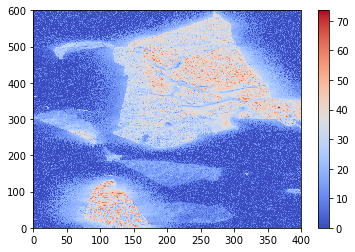

In [130]:
plt.pcolormesh(img_renorm * 100, cmap=cm)
plt.colorbar()